# Autocorrelation
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 10/27/2021          |
| Updated | 10/17/2022          |

## **Figure 4.**

Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1


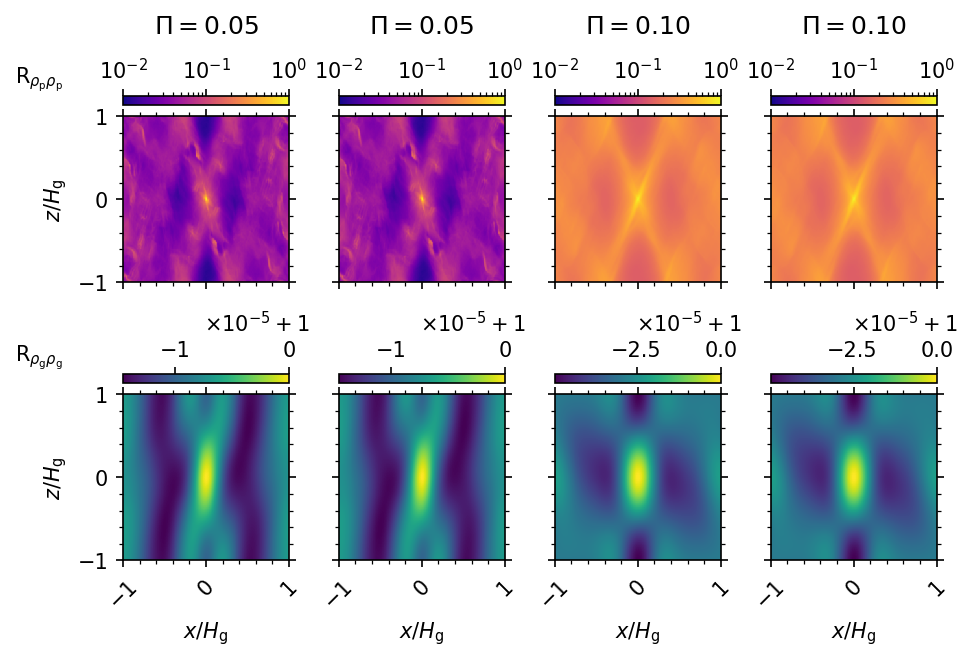

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.05', '0.05', '0.10', '0.10']
res = '256'
# vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'Π = {Pi}')
    print(f'\tmaxR_p = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=1e-2), cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'\tmaxR_g = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    fix = (shift-1)*1e5
    rhogs = axs[1][i].pcolormesh(xf, zf, fix)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={Pi:s}$', pad=40)
    axs[0][i].set(aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-5}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
# plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.subplots_adjust(wspace=0.3)
plt.show()

## **Figure 6.**

Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)


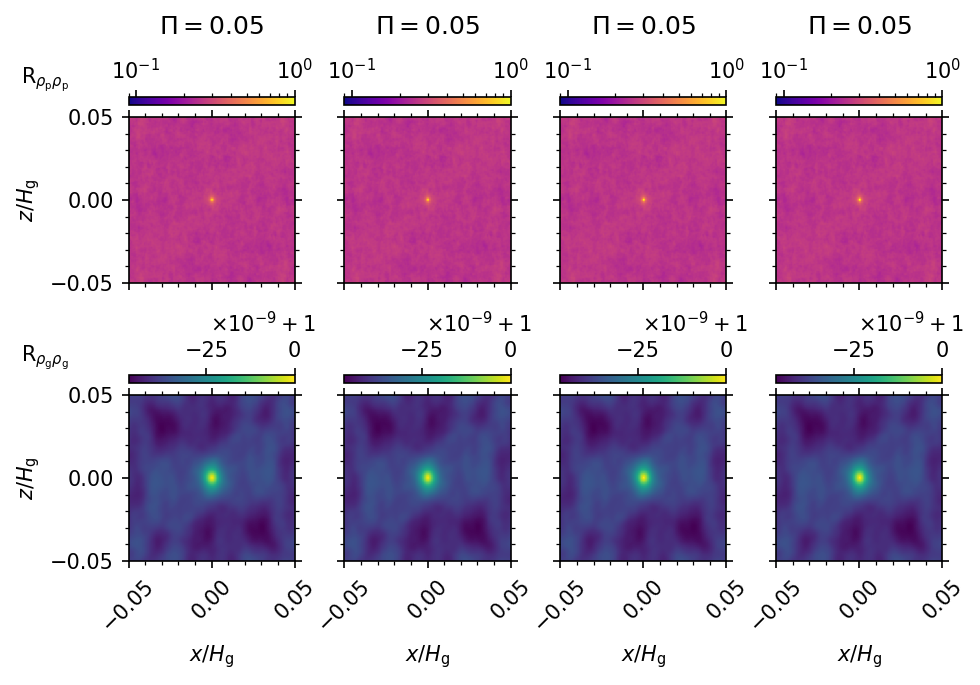

In [48]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.05', '0.05', '0.05', '0.05']
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    flat_i = np.argmax(ac)
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    flat_i = np.argmax(shift)
    print(f'Index of shifted max: {np.unravel_index((flat_i), (res, res))}')
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=0.09),
                                 cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e9
    rhogs = axs[1][i].pcolormesh(xf, zf, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=40)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-9}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)
for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.subplots_adjust(wspace=0.3)
# plt.savefig(f'figs/{case}_autocorrelations.png', dpi=1000,
#             bbox_inches='tight', pad_inches=0.01)
plt.show()

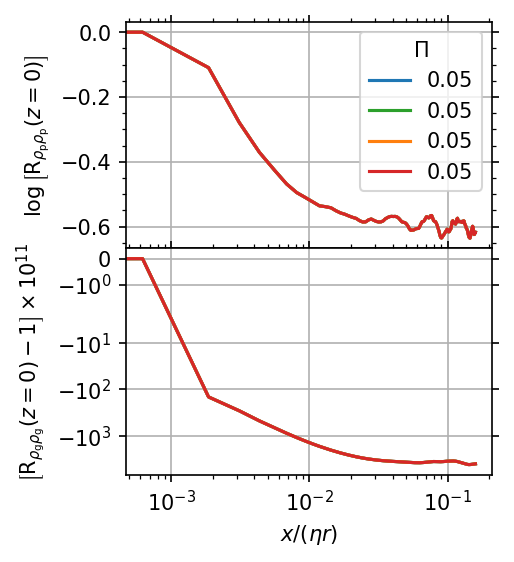

In [3]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    z0 = int(len(zv)/2)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11

    axs[0].semilogx(xv/etar, log[z0], color=Pi[1], label=Pi[0])
    axs[1].semilogx(xv/etar, offset[z0], color=Pi[1])

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left[\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}(z=0)\right]$')
axs[1].set(yscale='symlog', xlabel=r'$x/(\eta r)$',
           ylabel=r'$\left[\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}(z=0)-1\right]\times10^{11}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs-z0.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.


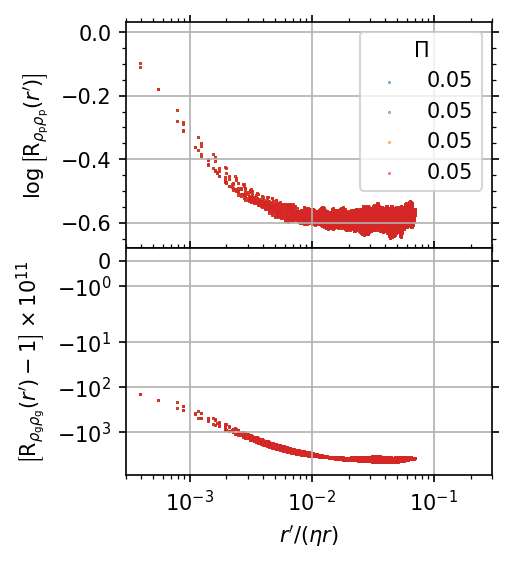

In [27]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11

    axs[0].scatter(rv, log, s=0.1, color=Pi[1], label=Pi[0])
    axs[1].scatter(rv, offset, s=0.1, color=Pi[1])

    # axs[0].scatter(rv/etar, log, s=0.1, color=Pi[1], label=Pi[0])
    # axs[1].scatter(rv/etar, offset, s=0.1, color=Pi[1])
    print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left[\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}(r^\prime)\right]$')
axs[1].set(xlim=(3e-4, 3e-1), ylim=(-9e3, 0.5), xscale='log', yscale='symlog',
           xlabel=r'$r^\prime/(\eta r)$',
           ylabel=r'$\left[\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}(r^\prime)-1\right]\times10^{11}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_pow-spect.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

In [29]:
# UNSCALE BY etar UNTIL WE'RE SATISFIED W/ RESULTS
# FIX XLIM/YLIM ISSUES

# PRUNING PTS OUTSIDE CIRCLE
# Check binned_statistics docs if data outside left/right-most edges are lumped into outer bins
#   if docs are unclear, check bin counts to verify
# Otherwise, use numpy to identify r' values > e.g. 0.05 in flattened r' array, and remove from 
# data

# UNIFORM BINS OF 4 PTS
# center of left-most bin is l_cell = box-length/res
# center of 2nd bin is np.sqrt(2)*l_cell
# divide center left-most bin by sqrt(ratio) to get left-most edge
# Iteratively multiply edges by ratio from left to right
# Count powers until right-most edge desired reached

AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.


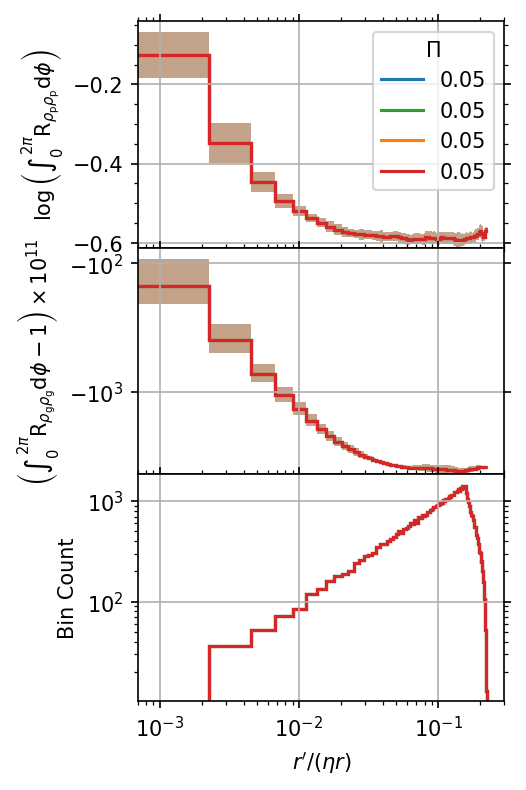

In [18]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

# fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = '256'
bins = 100

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bins)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=100)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bins)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bins)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bins)

    axs[0].stairs(dust_means, bin_edges/etar, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges/etar, baseline=dust_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges/etar, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges/etar, baseline=gas_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges/etar, color=Pi[1], lw=1.5)
    print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(7e-4, 3e-1), xscale='log', yscale='log',
           xlabel=r'$r^\prime/(\eta r)$', ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.
AB/0.05: Processing...
	done.


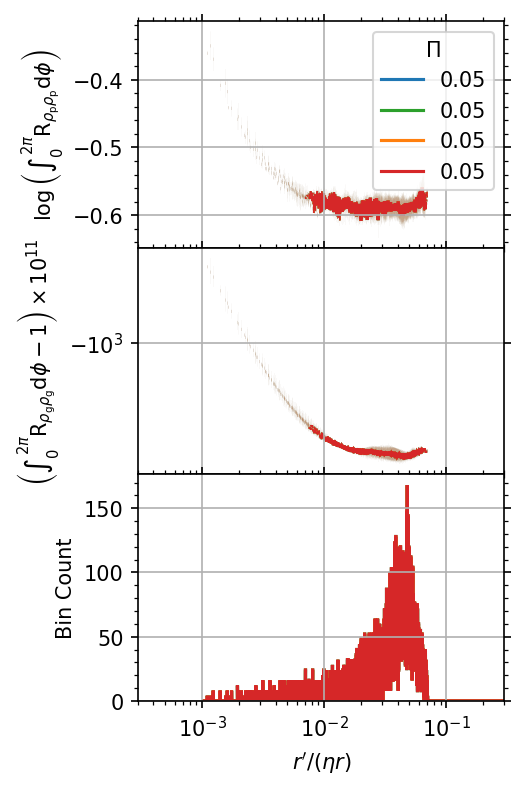

In [26]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

# fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = '256'
bins = 100

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    bin_edges = np.logspace(-3, -0.5, num=6553)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    # axs[0].stairs(dust_means, bin_edges/etar, baseline=float('-inf'),
    #               color=Pi[1], lw=1.5, label=Pi[0])
    # axs[0].stairs(dust_highs, bin_edges/etar, baseline=dust_lows, fill=True,
    #             color=Pi[1], alpha=0.2)
    # axs[1].stairs(gas_means, bin_edges/etar, baseline=float('-inf'),
    #               color=Pi[1], lw=1.5)
    # axs[1].stairs(gas_highs, bin_edges/etar, baseline=gas_lows, fill=True,
    #               color=Pi[1], alpha=0.2)
    # axs[2].stairs(bin_counts, bin_edges/etar, color=Pi[1], lw=1.5)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(3e-4, 3e-1), xscale='log', xlabel=r'$r^\prime/(\eta r)$',
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


In [28]:
bin_edges

array([0.001     , 0.00100088, 0.00100176, ..., 0.31567259, 0.31595006,
       0.31622777])

In [36]:

rs = [0, 1, np.sqrt(2), np.sqrt(3)]

for i in range(len(rs) - 1):
    area = np.pi*(rs[i+1]**2 - rs[i]**2)
    print(f'Annulus {i+1} area: {area}')

Annulus 1 area: 3.141592653589793
Annulus 2 area: 3.1415926535897944
Annulus 3 area: 3.1415926535897905


In [ ]:
const_area = np.pi*(r_out**2 - r_in**2)
r_in**2 = np.sqrt(r_out**2 - const_area/np.pi)

In [23]:
np.arange(start=10, stop=0, step=-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [40]:
Pis = [0.01, 0.02, 0.05, 0.1]
etar = np.asarray(Pis)*2*np.pi
x_max = 0.05
x_min = x_max/1024
x_mins = np.asarray([x_min, x_min, x_min, x_min])
r_mins = x_mins/etar
r_mins

array([7.77123746e-04, 3.88561873e-04, 1.55424749e-04, 7.77123746e-05])

In [ ]:
def eq_annuli(r_max, bins):
    print(f'r_max = {r_max}')
    A_tot = np.pi*r_max**2
    A_ann = A_tot/bins
    print(f'A_tot = {A_tot}\nA_ann = {A_ann}')
    bin_edges = np.zeros(bins + 1)
    bin_edges[-1] = r_max
    print(f'bin_edges (init) = {bin_edges}')

AB/0.05: Processing...
r_max = 0.07071067811865477
A_tot = 0.01570796326794897
A_ann = 0.001570796326794897
bin_edges (init) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07071068]
bin_edges[i+1] = 0.0
bin_edges[i+1] = nan
bin_edges[i+1] = nan
bin_edges[i+1] = nan
bin_edges[i+1] = nan
bin_edges[i+1] = nan
bin_edges[i+1] = nan
bin_edges[i+1] = nan


<ipython-input-37-6af274c80543>:26: RuntimeWarning: invalid value encountered in sqrt
  bin_edges[i] = np.sqrt(bin_edges[i+1] - A_ann/np.pi)


ValueError: bins must be monotonically increasing or decreasing

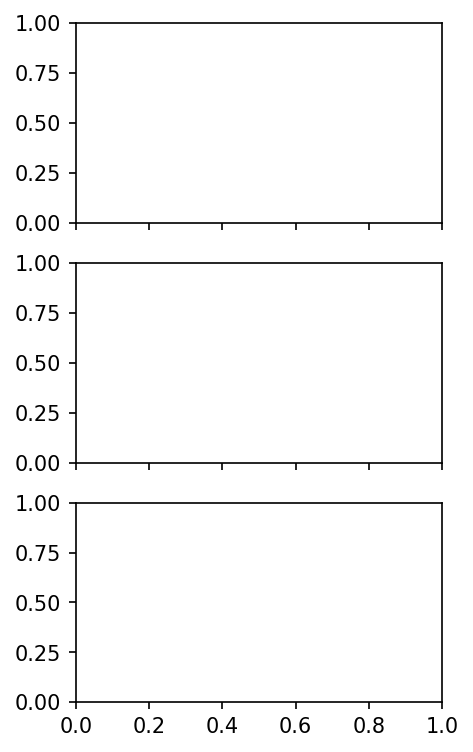

In [37]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt(x**2 + z**2)
    return rv

def eq_annuli(r_max, bins):
    print(f'r_max = {r_max}')
    A_tot = np.pi*r_max**2
    A_ann = A_tot/bins
    print(f'A_tot = {A_tot}\nA_ann = {A_ann}')
    bin_edges = np.zeros(bins + 1)
    bin_edges[-1] = r_max
    print(f'bin_edges (init) = {bin_edges}')

    for i in np.arange(start=(bins - 2), stop=0, step=-1):
        print(f'bin_edges[i+1] = {bin_edges[i+1]}')
        bin_edges[i] = np.sqrt(bin_edges[i+1] - A_ann/np.pi)
    return bin_edges

# fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = '256'
bins = 10

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv, xf_max = data['x1v'], data['x2v'], data['x1f'][-1]
    rv = norms(xv, zv)
    r_max = np.sqrt(2*xf_max**2)
    bin_edges = eq_annuli(r_max, bins)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(), log.ravel(),
        statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(), log.ravel(),
        statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(), offset.ravel(),
        statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(), offset.ravel(),
        statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(), rv.ravel(),
        statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges/etar, baseline=float('-inf'), color=Pi[1],
                  lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges/etar, baseline=dust_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges/etar, baseline=float('-inf'), color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges/etar, baseline=gas_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges/etar, color=Pi[1], lw=1.5)
    print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xscale='log', yscale='log', xlabel=r'$r^\prime/(\eta r)$', 
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)
